#  Sentiment Analysis on Amazon Food Reviews

## ABSTRACT

Sentimental analysis is area of research for the social media and reviews. It can deliver the different services like marekting data, how to improve product or service, about medicine and also many other services. It is very interesting to work with sentimental analysis because we have to interact with the human languages (words/reviews/comments) and identify subjective informations.

Few algorithms like Naive Bayes and SVM are commonly used for snetimental analysis. Also, RNN (Recurrent Neural Network), Deep Learning and Machine Learning has started to perform all other functions because of its ability to predict the meaning of sentence based on sentence structure. 

Path for the file to be saved

In [1]:
pwd

'/Users/user/Documents/Advance Data Science & Architecture'

 Import Statements

In [160]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from itertools import chain
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
import re
import string
import nltk
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from gensim.models import Word2Vec
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
import re
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
from sklearn import svm
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.neighbors import KNeighborsClassifier

# Problem Statement
Here I need to predict the positive or negative target reviews for each data row. The goal will be to maximize the accuracy of this classification. We will train our model on a dataset containing thousands of reviews presented as unstructured text. Each review will be labeled as positive or negative.

To solve this problem we will perform the following tasks:

Preprocess the data.
Train and tune the hyperparameters of the recurrent neural network.
Test the accuracy of the model on the testing set.

# Exploratory Data Analysis

# Amazon Food reviews provided a set of around 500,000 highly polar food reviews

# Importing the data set

In [3]:
df = pd.read_csv("FoodReview.csv")

DATA TYPE COUNT

In [4]:
df.get_dtype_counts()

int64     5
object    5
dtype: int64

What are the fields provided in the Amazon fine food reviews dataset?

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Prediction,Time,Summary,Text
0,492346,B001VNP0Y6,AEZRVY3CV52UZ,"Corey Wright ""Democratus""",3,3,5,1320537600,Just what I needed,I got them in a very timely manner and they're...
1,343811,B008J1HO4C,A18VZYSLOUO060,"D. Simpson ""Frugal SOB""",2,2,5,1204329600,Most excellent oatmeal,McCann's Steel Cut Oatmeal is the perfect brea...
2,347257,B000FFIL60,A28Y1M7GRG0I9M,"Real Comments ""Lin""",0,0,4,1318464000,Quality Tea,I would recommend it. Quality pearls and a few...
3,225529,B002ZX1U9A,A245HC4T5J97WG,Logan DeAngelis,0,0,5,1306540800,Great Coffee at a Great price,"I have to admit, I first purchased these Hazel..."
4,485488,B001RVFERK,AVABPJCKE2MR5,spal,0,0,4,1314921600,Popchips Jalapeno flavor,I bought a case of jalapeno chips as I love th...


Here, data contains the column "TEXT" for the specific user to represent the review of that product having unique productId. Also, unique productId can help to find the product from the list on Amazon and can find all the reviews related to that product and can review the product. The UserId is used to get the user information who have logged in to review the food product. Two columns HelpfulnessNumerator and HelpfullnessDenominator are helpful to provide the review information based on the summary. The column Prediction shows the review based on scale fof 5. Time column provide the information about the review posted time by the user on Amazon. Summary can help to get idea about positive or negative review for the product.

More importantly, for each review, we have a “Prediction” variable representing a rating from 1 to 5 (1 is a poor review, and 5 is an excellent review).




In [6]:
len(df.index)

50000

# Checking for Null values

In [7]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Id                        0
ProductId                 0
UserId                    0
ProfileName               1
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Prediction                0
Time                      0
Summary                   2
Text                      0
dtype: int64

In [8]:
df.dropna(subset=['ProfileName'], inplace=True)

In [9]:
df.dropna(subset=['Summary'], inplace=True)

In [10]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Prediction                0
Time                      0
Summary                   0
Text                      0
dtype: int64

Removed null values 

In [11]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Prediction,Time
count,49997.000000,49997.000000,49997.000000,49997.000000,4.999700e+04
mean,282543.225274,1.723563,2.208373,4.177991,1.295999e+09
std,164186.134793,7.184771,7.781205,1.313575,4.804307e+07
min,5.000000,0.000000,0.000000,1.000000,9.515232e+08
25%,139719.000000,0.000000,0.000000,4.000000,1.270685e+09
50%,282243.000000,0.000000,1.000000,5.000000,1.310774e+09
75%,424337.000000,2.000000,2.000000,5.000000,1.332461e+09
max,568445.000000,536.000000,539.000000,5.000000,1.351210e+09


### Checking for Unique values

In [12]:
Nunique = df.nunique()
Nunique = Nunique.sort_values()
Nunique

Prediction                    5
HelpfulnessNumerator        108
HelpfulnessDenominator      111
Time                       2516
ProductId                 20697
ProfileName               37155
Summary                   39246
UserId                    40284
Text                      46359
Id                        49997
dtype: int64

We can see that, dataframe contains around 20697 different products and around 40284 
users have reviewd the food products which helps to get the different reviews around 49997 for the food. 

### Non Zero Prediction Values

How many reviews are included in this dataset?

In [13]:
print("non-zero values for Prediction")
print(sum(df['Prediction']>0))

non-zero values for Prediction
49997


The dataset contains 49997 food reviews Amazon users.

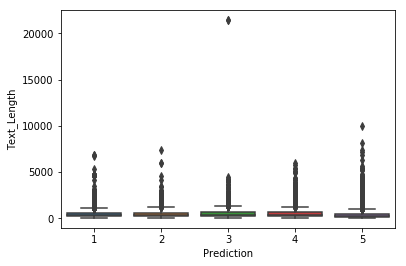

In [14]:
df['Text_Length'] = df['Text'].apply(len)

sns.boxplot(x='Prediction', y='Text_Length',data=df)
plt.show()

Box plot for this dispalys that prediction score acccording to the summary for Score 5 is almost accuracte and even for Score 4 

### Correlation between the columns of data set

In [15]:
correlations = [[(index1, index2) for index2, column in row.iteritems() if column>0.6 and index1 != index2] 
 for index1, row in df.corr().iterrows()]
print("List of highly correlated variables:")
print()
for correlation in correlations:
    for item in correlation:
        print(item[0]," and ",item[1])

List of highly correlated variables:

HelpfulnessNumerator  and  HelpfulnessDenominator
HelpfulnessDenominator  and  HelpfulnessNumerator


Above result shows that HelpfullnessNumerator and HelpfullnessDenominator are very 
close to each other and cor-related to each other. 

### Correlation via Heat-Map

                        HelpfulnessNumerator  HelpfulnessDenominator  \
HelpfulnessNumerator                1.000000                0.974530   
HelpfulnessDenominator              0.974530                1.000000   
Prediction                         -0.036838               -0.106642   
Time                               -0.162954               -0.182887   

                        Prediction      Time  
HelpfulnessNumerator     -0.036838 -0.162954  
HelpfulnessDenominator   -0.106642 -0.182887  
Prediction                1.000000 -0.068105  
Time                     -0.068105  1.000000  


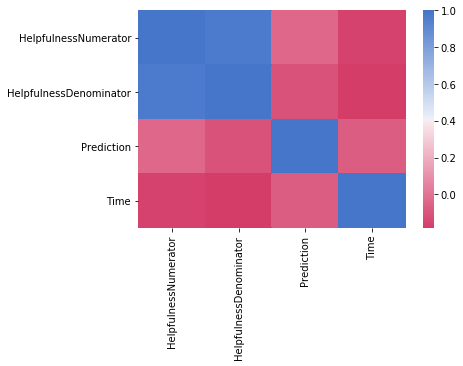

In [16]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Prediction', 'Time']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)
plt.show()

Above figure shows the relation between all the numerical columns that are related to each other and how much they are related to others. We can figure out that column having value near to 1.o is most correlated to that other column.

### Displaying Usefulness of the review 

Can we get idea about the usefulness of the reviews from dataset?

In [17]:
df["Sentiment"] = df["Prediction"].apply(lambda score: "positive" if score > 3 else "negative")
df["Usefulness"] = (df["HelpfulnessNumerator"]/df["HelpfulnessDenominator"]).apply(lambda n: "useful" if n > 0.8 else "useless")

df.head(50)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Prediction,Time,Summary,Text,Text_Length,Sentiment,Usefulness
0,492346,B001VNP0Y6,AEZRVY3CV52UZ,"Corey Wright ""Democratus""",3,3,5,1320537600,Just what I needed,I got them in a very timely manner and they're...,271,positive,useful
1,343811,B008J1HO4C,A18VZYSLOUO060,"D. Simpson ""Frugal SOB""",2,2,5,1204329600,Most excellent oatmeal,McCann's Steel Cut Oatmeal is the perfect brea...,401,positive,useful
2,347257,B000FFIL60,A28Y1M7GRG0I9M,"Real Comments ""Lin""",0,0,4,1318464000,Quality Tea,I would recommend it. Quality pearls and a few...,214,positive,useless
3,225529,B002ZX1U9A,A245HC4T5J97WG,Logan DeAngelis,0,0,5,1306540800,Great Coffee at a Great price,"I have to admit, I first purchased these Hazel...",247,positive,useless
4,485488,B001RVFERK,AVABPJCKE2MR5,spal,0,0,4,1314921600,Popchips Jalapeno flavor,I bought a case of jalapeno chips as I love th...,303,positive,useless
5,74981,B0026RQTGE,A161Y9NAR43WCW,vertov,0,0,5,1314835200,Our dog has fresh breath,No doggie breath for our dog. People are alwa...,268,positive,useless
6,204180,B000F0FZE6,A1H35JZ9UUCVIF,carrera4,1,1,5,1330646400,Great Pasta & Healthy!,I tried this pasta after viewing the Dr. Oz sh...,331,positive,useful
7,454372,B0019K981W,A13H71301WENPW,"Patricia Fentriss ""PF""",11,13,1,1249344000,Sugar bomb!!! Same amount of sugar as a 12 oz...,Check out the sugar content before you buy! 2...,187,negative,useful
8,112235,B0009JJB4S,A2HBOYLMGW2A5Y,lee,0,0,5,1345852800,Pretty great for the price!,"I drink Iron goddess oolong pretty often, it i...",543,positive,useless
9,295251,B000LQNK50,ATO0RF3HWQ3WW,"Scott ""Scottso""",12,16,3,1236729600,Its OK,Maybe it's due to my tendency to prefer noodle...,825,negative,useless


### Splitting dataframe into train and test data

How will you do sentimental analysis on the datasets? How will you start implementations?

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

df["Summary_Clean"] = df["Summary"].apply(cleanup)

train, test = train_test_split(df, test_size=0.2)
print("%d items in training data, %d in test data" % (len(train), len(test)))

39997 items in training data, 10000 in test data


We can start implementation by creating Test and Train data. Here, 363778 data rows are in training data and 90945 data rows are in Test data. Now we can implement the diff analysis using this Train and Test data.

# Sentiment scores

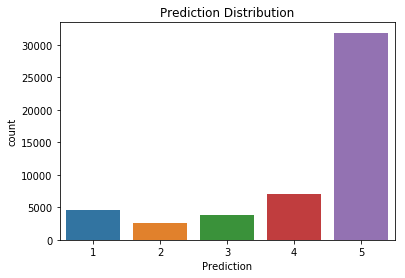

In [19]:
ax = plt.axes()
sns.countplot(df.Prediction,ax=ax)
ax.set_title('Prediction Distribution')
plt.show()

Prediction Score for 5 is very high compared to otherr prediction values

In [20]:
print("Average Score: ",np.mean(df.Prediction))
print("Median Score: ",np.median(df.Prediction))

Average Score:  4.177990679440766
Median Score:  5.0


After creating a new variable named Sentiment that is set to NEGATIVE when the Score is between 1 and 3, and POSITIVE when the Score is equal to 4 or 5, we get this new distribution:

# Score prediction

Logistic regression model on word count

In [21]:
from wordcloud import WordCloud, STOPWORDS

# To cleanup stop words, add stop_words = STOPWORDS
# But it seems to function better without it
count_vect = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = count_vect.fit_transform(train["Summary_Clean"])

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["Sentiment"]
y_test = test["Sentiment"]

prediction = dict()

# Model Accuracy

Model Accuracy is found out to be great like around 93% with higly used positive and negative words in the reviews.

In [22]:
cdf = df[df['Prediction'] != 3]
X = cdf['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = cdf['Prediction'].map(y_dict)

c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    
text_fit(X, y, c, LogisticRegression())

# features: 40528
# train records: 34641
# test records: 11547
Model Accuracy: 0.9148696631159609

-Top 20 positive-
Coefficient          Word
   2.236875     complaint
   2.035461       awesome
   1.899275     delicious
   1.894017    reasonably
   1.851596  surprisingly
   1.766456         yummy
   1.723691     boyfriend
   1.710550     beautiful
   1.687512     excellent
   1.673610       perfect
   1.630447         loves
   1.583106        heaven
   1.578446        hooked
   1.561294        update
   1.527788          fits
   1.518601        smooth
   1.502272         keeps
   1.493244    complaints
   1.492781    pleasantly
   1.471916        highly

-Top 20 negative-
Coefficient            Word
  -1.697347      overpriced
  -1.706039       returning
  -1.718108         heating
  -1.728178            weak
  -1.751525       cancelled
  -1.769369         useless
  -1.773553           stale
  -1.782091           awful
  -1.791874             mud
  -1.795986         sounded
  -1.83756

# Logistic regression model on TFIDF

Can we capture the list of the words for Positive reviews and Negative reviews from the dataset?

TFIDF means that it takes particular word and takes summary or review under consideration

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 40528
# train records: 34641
# test records: 11547
Model Accuracy: 0.9090672902052481

-Top 20 positive-
Coefficient       Word
   9.509096      great
   7.106274       best
   6.491383  delicious
   6.053665       love
   5.367147    perfect
   5.345422       good
   5.330490      loves
   4.595049  excellent
   4.538043  wonderful
   4.497269       nice
   4.437109   favorite
   4.178098     highly
   3.558490    awesome
   3.555140      happy
   3.378256        day
   3.323439      works
   3.298859     smooth
   3.298127       easy
   3.162987    pleased
   3.148371      tasty

-Top 20 negative-
Coefficient            Word
  -3.220691        thinking
  -3.259064           gross
  -3.288021           maybe
  -3.376573           nasty
  -3.443924           china
  -3.579517           threw
  -3.693829             bad
  -3.784569        horrible
  -3.938371   unfortunately
  -3.939239            weak
  -4.038683  disappointment
  -4.234805           stale
  -4.414137      

From above logic, you can see that we have captured the 20 positive words used in dataset reviews and 20 negative words used in dataset review. Based on this words, we can predict the food reviews and based on that we can suggest the good and bad food from the productId of the Amazon food.

In [24]:
odf = pd.read_csv('FoodReview.csv')
odf['Helpful %'] = np.where(odf['HelpfulnessDenominator'] > 0, odf['HelpfulnessNumerator'] / odf['HelpfulnessDenominator'], -1)
odf['% Upvote'] = pd.cut(odf['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
odf.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Prediction,Time,Summary,Text,Helpful %,% Upvote
0,492346,B001VNP0Y6,AEZRVY3CV52UZ,"Corey Wright ""Democratus""",3,3,5,1320537600,Just what I needed,I got them in a very timely manner and they're...,1.0,80-100%
1,343811,B008J1HO4C,A18VZYSLOUO060,"D. Simpson ""Frugal SOB""",2,2,5,1204329600,Most excellent oatmeal,McCann's Steel Cut Oatmeal is the perfect brea...,1.0,80-100%
2,347257,B000FFIL60,A28Y1M7GRG0I9M,"Real Comments ""Lin""",0,0,4,1318464000,Quality Tea,I would recommend it. Quality pearls and a few...,-1.0,Empty
3,225529,B002ZX1U9A,A245HC4T5J97WG,Logan DeAngelis,0,0,5,1306540800,Great Coffee at a Great price,"I have to admit, I first purchased these Hazel...",-1.0,Empty
4,485488,B001RVFERK,AVABPJCKE2MR5,spal,0,0,4,1314921600,Popchips Jalapeno flavor,I bought a case of jalapeno chips as I love th...,-1.0,Empty


Upvote value is generated by the Helpfulness denominator and numerator and proper value is assigned to it

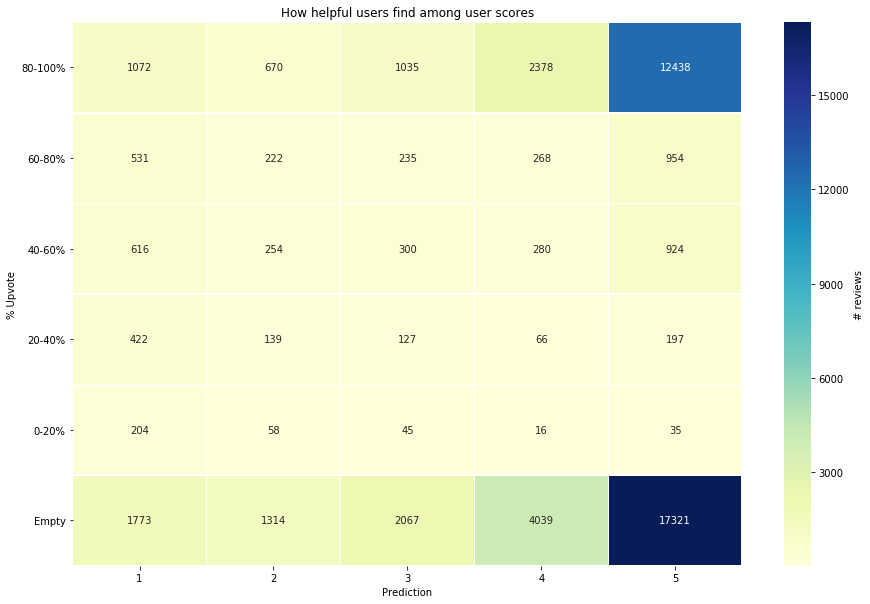

In [25]:
df_s = odf.groupby(['Prediction', '% Upvote']).agg({'Id': 'count'})
df_s = df_s.unstack()
df_s.columns = df_s.columns.get_level_values(1)
fig = plt.figure(figsize=(15,10))

sns.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among user scores')
plt.show()

This shows the prediction score usefulness according to the highly used score in the data frame

In [172]:
cdf = odf[odf['Prediction'] != 3]
X = cdf['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = cdf['Prediction'].map(y_dict)

Counter Vectorization is used to display the top 20 positive and nnegative words from the data frame and then later calculating the accuracy of the reviews

In [173]:
c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    
text_fit(X, y, c, LogisticRegression())

# features: 40529
# train records: 34643
# test records: 11548
Model Accuracy: 0.9133183235192242

-Top 20 positive-
Coefficient          Word
   1.900403     delicious
   1.796278    refreshing
   1.795107     excellent
   1.794320       awesome
   1.785190    complaints
   1.783095      addicted
   1.778455         yummy
   1.751457    reasonably
   1.740685     complaint
   1.736089     exception
   1.733043         loves
   1.718482  surprisingly
   1.676317       perfect
   1.585390        hooked
   1.545296    pleasantly
   1.520983     wonderful
   1.515572         keeps
   1.505594          best
   1.473191      cheapest
   1.467398         thank

-Top 20 negative-
Coefficient            Word
  -1.697450            yuck
  -1.714119            weak
  -1.723477    disappointed
  -1.732617        returned
  -1.753435           stale
  -1.772196      disgusting
  -1.787297        horrible
  -1.818849       tasteless
  -1.825936             mud
  -1.831647       returning
  -1.84123

Accuracy is around 91.3% - not bad. However we notice that some of those significant coefficients are not meaningful, e.g. 280mg.



In [174]:
text_fit(X, y, c, DummyClassifier(),0)

# features: 40529
# train records: 34643
# test records: 11548
Model Accuracy: 0.7308624870107377


### Logistic regression model on TFIDF 

In [175]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 40529
# train records: 34643
# test records: 11548
Model Accuracy: 0.907776238309664

-Top 20 positive-
Coefficient       Word
   9.406671      great
   7.111112       best
   6.646878  delicious
   6.240188       love
   5.622133      loves
   5.524826       good
   5.351043    perfect
   4.919797  excellent
   4.585235  wonderful
   4.496860       nice
   4.438826   favorite
   4.137682     highly
   3.550889      works
   3.520353      happy
   3.493334      tasty
   3.365840     smooth
   3.340125    amazing
   3.335163    awesome
   3.222663       easy
   3.148111      yummy

-Top 20 negative-
Coefficient            Word
  -3.273420           worse
  -3.366496           maybe
  -3.380910           china
  -3.388270           threw
  -3.389921            poor
  -3.454534           bland
  -3.618810             bad
  -3.961844  disappointment
  -4.005242   unfortunately
  -4.211264            weak
  -4.226713          return
  -4.323792         thought
  -4.377436       

Calculating the accuracy of the system via calcilating the accuracy of top positive annd negative words

Accurancy is roughly the same - 90.77%. However we notice that the significant words make much more sense now, with higher coefficient magnitude as well!

In [30]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 812863
# train records: 34643
# test records: 11548
Model Accuracy: 0.8857810876342224

-Top 20 positive-
Coefficient       Word
  11.125209      great
   7.870764       best
   7.789986       love
   6.741824  delicious
   6.376549       good
   5.725082      loves
   5.582242    perfect
   5.005890   favorite
   4.955681       nice
   4.749816  excellent
   4.514978  wonderful
   3.765885       easy
   3.676540      tasty
   3.583019     highly
   3.543941      happy
   3.326616      snack
   3.276813        day
   3.197516     stores
   3.145809     smooth
   3.142435      works

-Top 20 negative-
Coefficient           Word
  -3.458828    description
  -3.492266    tastes like
  -3.502440          threw
  -3.665048          waste
  -3.753715          china
  -3.817016           weak
  -3.896788          maybe
  -3.997145  unfortunately
  -4.069261  disappointing
  -4.123043            did
  -4.577122          stale
  -4.695557         return
  -4.758691       horrible
  

### Logistic regression model on TFIDF + ngram

Can we capture the list of the words for Positive reviews and Negative reviews from the dataset?

In [31]:
cdf = cdf[cdf['Prediction'] == 5]
cdf = cdf[cdf['% Upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
cdf.shape

X = cdf['Text']
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = cdf['% Upvote'].map(y_dict)

print('Class distribution:')
print(y.value_counts())

Class distribution:
1    13392
0      232
Name: % Upvote, dtype: int64


From above logic, you can see that we have captured the 20 positive words used in dataset reviews and 20 negative words used in dataset review. Based on this words, we can predict the food reviews and based on that we can suggest the good and bad food from the productId of the Amazon food.

In [32]:
df_s = pd.DataFrame(data = [X,y]).T

Downvote_records = len(df_s[df_s['% Upvote'] == 0])
Downvote_indices = np.array(df_s[df_s['% Upvote'] == 0].index)

Upvote_indices = df_s[df_s['% Upvote'] == 1].index

random_upvote_indices = np.random.choice(Upvote_indices, Downvote_records, replace = False)
random_upvote_indices = np.array(random_upvote_indices)

under_sample_indices = np.concatenate([Downvote_indices,random_upvote_indices])

under_sample_data = df_s.ix[under_sample_indices, :]
X_u = under_sample_data['Text']
under_sample_data['% Upvote'] = under_sample_data['% Upvote'].astype(int)
y_u = under_sample_data['% Upvote']


print("Percentage of upvote transactions: ", len(under_sample_data[under_sample_data['% Upvote'] == 1])/len(under_sample_data))
print("Percentage of downvote transactions: ", len(under_sample_data[under_sample_data['% Upvote'] == 0])/len(under_sample_data))
print("Total number of records in resampled data: ", len(under_sample_data))

Percentage of upvote transactions:  0.5
Percentage of downvote transactions:  0.5
Total number of records in resampled data:  464


After calculating the ratio between the frequency count in the positive review divided by the frequency count in the negative review for each word, here are the results:

When the ratio is high (greater than 1), it means than the words tend to occur more often in positive reviews than in negative reviews.

Can we filter the special characters from the text column?

In [33]:
c = CountVectorizer(stop_words = 'english')

text_fit(X_u, y_u, c, LogisticRegression())

# features: 4376
# train records: 348
# test records: 116
Model Accuracy: 0.5603448275862069

-Top 20 positive-
Coefficient         Word
   0.799758           ve
   0.758751         make
   0.689269       ginger
   0.670242       bitter
   0.648299        blend
   0.622578         dogs
   0.583257    wonderful
   0.578314          oil
   0.577700      protein
   0.576293      flavors
   0.572408         need
   0.571506          try
   0.554236      cookies
   0.552134        light
   0.549020         milk
   0.545444   definitely
   0.532131      tasting
   0.529806      quality
   0.527937  ingredients
   0.525333      regular

-Top 20 negative-
Coefficient       Word
  -0.408963     priced
  -0.410372     easier
  -0.424496       know
  -0.436274      guess
  -0.445096       life
  -0.455009     highly
  -0.467618  recommend
  -0.477904      packs
  -0.514334       list
  -0.516429      early
  -0.521031      drink
  -0.555607     amazon
  -0.556803      syrup
  -0.603119     stores

Calculating the coeffciency of words from tthe reviews wrt by eliminating the stop words

In [34]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')

text_fit(X_u, y_u, tfidf_n, LogisticRegression())

# features: 19218
# train records: 348
# test records: 116
Model Accuracy: 0.603448275862069

-Top 20 positive-
Coefficient          Word
   0.575400            ve
   0.518527          milk
   0.512808          make
   0.479241        ginger
   0.471903          food
   0.459899           cat
   0.444517           dog
   0.417989          dogs
   0.407911         tried
   0.380999   ingredients
   0.376463        flavor
   0.373451       flavors
   0.371083         light
   0.355310        little
   0.354241           oil
   0.348994       quality
   0.345226          need
   0.328104     wonderful
   0.327364  best tasting
   0.323748       tasting

-Top 20 negative-
Coefficient       Word
  -0.237391  ice cream
  -0.244588     steaks
  -0.244874      br br
  -0.245716   enjoying
  -0.247453       life
  -0.247937       item
  -0.248063     skinny
  -0.250378     course
  -0.272275       know
  -0.273472     highly
  -0.273869      syrup
  -0.274769      early
  -0.283887  delivered
 

In [35]:
print('Downvote score 5 comments examples:')
print(under_sample_data[under_sample_data['% Upvote']==0]['Text'].iloc[:100:20])
print('Upvote score 5 comments examples')
print(under_sample_data[under_sample_data['% Upvote']==1]['Text'].iloc[:100:20])

Downvote score 5 comments examples:
845      I thank that the French  vanilla cappuccino  i...
5156     It took two or three cans, but I love these no...
9270     cook for all recipes and for everyday re-heati...
15389    Non-GE - "GE" stands for genetic engineering a...
19342    My daughter is away at bording shcool and loiv...
Name: Text, dtype: object
Upvote score 5 comments examples
5245     If you haven't tried this chili powder yet, yo...
21564    You might think pasta is pasta, but no.  This ...
45445    Is Wellness relatively expensive? Yes. Is it w...
21641    I fell in love with Jamaica Blue Mountain coff...
3009     I have 2 cats and this has been their fav for ...
Name: Text, dtype: object


Distinguishing the reviews from the dataframe

In [36]:
under_sample_data['word_count'] = under_sample_data['Text'].apply(lambda x: len(x.split()))
under_sample_data['capital_count'] = under_sample_data['Text'].apply(lambda x: sum(1 for c in x if c.isupper()))
under_sample_data['question_mark'] = under_sample_data['Text'].apply(lambda x: sum(1 for c in x if c == '?'))
under_sample_data['exclamation_mark'] = under_sample_data['Text'].apply(lambda x: sum(1 for c in x if c == '!'))
under_sample_data['punctuation'] = under_sample_data['Text'].apply(lambda x: sum(1 for c in x if c in punctuation))

print(under_sample_data.groupby('% Upvote').agg({'word_count': 'mean', 'capital_count': 'mean', 'question_mark': 'mean', 'exclamation_mark': 'mean', 'punctuation': 'mean'}).T)

X_num = under_sample_data[under_sample_data.columns.difference(['% Upvote', 'Text'])]
y_num = under_sample_data['% Upvote']

% Upvote                  0          1
word_count        72.784483  84.892241
capital_count     18.607759  13.849138
question_mark      0.163793   0.068966
exclamation_mark   1.043103   0.918103
punctuation       17.616379  20.086207


## Comparing the train and test data accuracy between Logistic Regressionn and SVM

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, random_state=0)

clf_lr = LogisticRegression().fit(X_train, y_train)
acc_lr = clf_lr.score(X_test, y_test)
print('Logistic Regression accuracy: {}'.format(acc_lr))

clf_svm = svm.SVC().fit(X_train, y_train)
acc_svm = clf_svm.score(X_test, y_test)
print('SVM accuracy: {}'.format(acc_svm))

Logistic Regression accuracy: 0.5689655172413793
SVM accuracy: 0.5172413793103449


In [38]:
df_user = odf.groupby(['UserId', 'ProfileName']).agg({'Prediction':['count', 'mean']})
df_user.columns = df_user.columns.get_level_values(1)
df_user.columns = ['Prediction count', 'Prediction mean']
df_user = df_user.sort_values(by = 'Prediction count', ascending = False)
print(df_user.head(10))

                                                       Prediction count  \
UserId         ProfileName                                                
A1YUL9PCJR3JTY O. Brown "Ms. O. Khannah-Brown"                       41   
AY12DBB0U420B  Gary Peterson                                         38   
A3OXHLG6DIBRW8 C. F. Hill "CFH"                                      38   
A281NPSIMI1C2R Rebecca of Amazon "The Rebecca Review"                32   
A1Z54EM24Y40LL c2                                                    28   
A3TVZM3ZIXG8YW christopher hayes                                     22   
AKMEY1BSHSDG7  J. Arena                                              20   
A3D6OI36USYOU1 Ghenghis                                              20   
A31N6KB160O508 Fran W.                                               20   
A1TMAVN4CEM8U8 Gunner                                                18   

                                                       Prediction mean  
UserId         ProfileName

Based on the prediction value for each data, we can make a decision about the positive and negative reviews. Data with the prediction value less than 3 will be considered as a negative review and data with the greater than 3 will be considered as positive review. Based on this consideration, we will decide the product of amazon food.

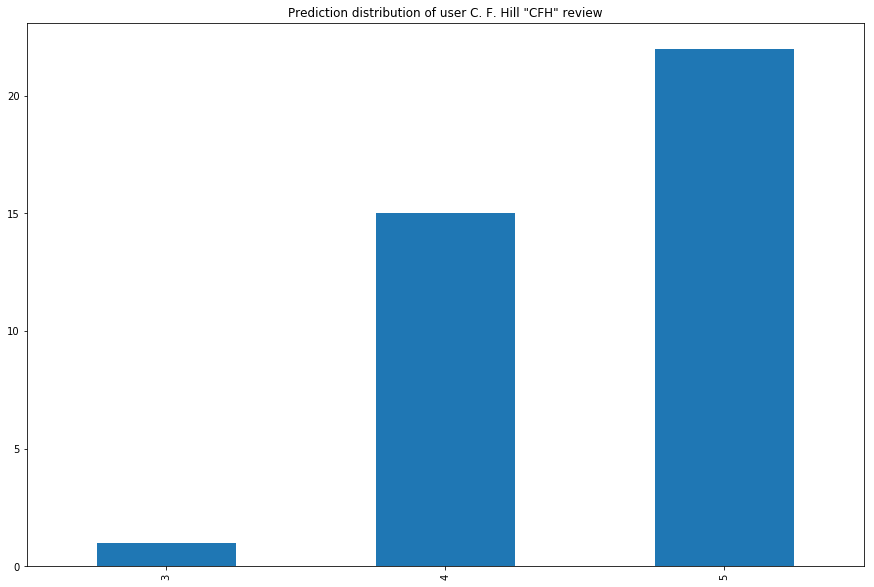

In [39]:
def plot_user(UserId):
    df_1user = odf[odf['UserId'] == UserId]['Prediction']
    df_1user_plot = df_1user.value_counts(sort=False)
    ax = df_1user_plot.plot(kind = 'bar', figsize = (15,10), title = 'Prediction distribution of user {} review'.format(odf[odf['UserId'] == UserId]['ProfileName'].iloc[0]))

plot_user('A3OXHLG6DIBRW8')
plt.show()

Review prediction according to the particular user for different products 

In [40]:
print(df_user[(df_user['Prediction mean']<3.5) & (df_user['Prediction mean']>2.5)].head())

                                                             Prediction count  \
UserId         ProfileName                                                      
A2XNJJ9TF70P4J Angie                                                       12   
A1SCANWWQTEG9I TheLastCoyote                                               11   
A2TN9C5E4A0I3F Jimmy                                                       10   
A1M5D0DG09UGVM Bonne Maman                                                  9   
A132ETQPMHQ585 Donna's Reviews "I Love Shopping on Amazon!"                 9   

                                                             Prediction mean  
UserId         ProfileName                                                    
A2XNJJ9TF70P4J Angie                                                2.666667  
A1SCANWWQTEG9I TheLastCoyote                                        3.000000  
A2TN9C5E4A0I3F Jimmy                                                2.700000  
A1M5D0DG09UGVM Bonne Maman           


Calculating the prediction mean snd count like for a particular product there are how many good prediction count and the average of those

# Prediction of user A.bennett reviews

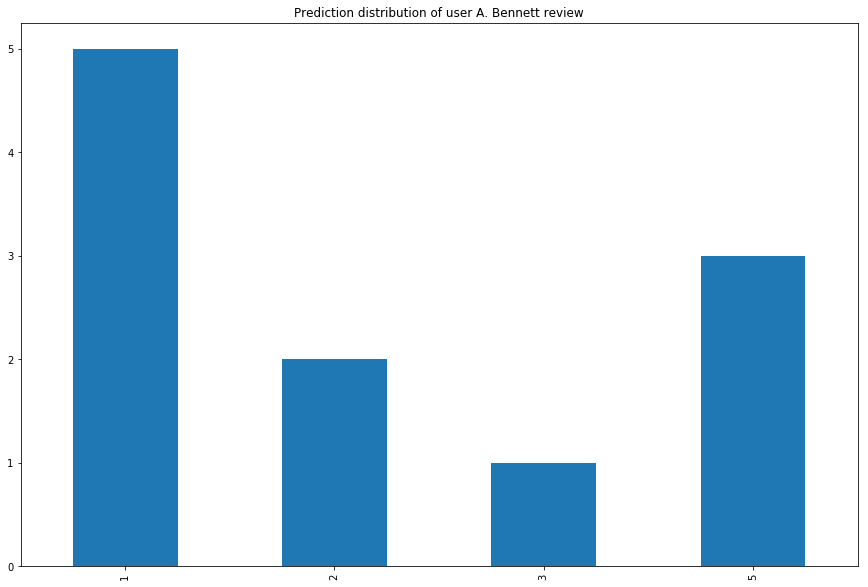

In [41]:
plot_user('A2M9D9BDHONV3Y')
plt.show()

The following code conducts basic sentiment analysis and finds the average sentiment PER WORD of each group of reviews. As expected, the higher the score given the more positive the review sentiment. Interestingly the sentiment seems to be stronger per word in the review title than in the text of the review itself. Presumably this is because the reviewer is trying to convay there happiness or displeasure as succinctly as possible.

In [42]:
def get_token_ngram(prediction, benchmark, userid='all'):

    if userid != 'all':
        cdf = odf[(odf['UserId'] == userid) & (odf['Prediction'] == prediction)]['Text']
    else:
        cdf = odf[odf['Prediction'] == prediction]['Text']
        
    count = len(cdf)
    total_text = ' '.join(cdf)
    total_text = total_text.lower()
    stop = set(stopwords.words('english'))
    total_text = nltk.word_tokenize(total_text)
    total_text = [word for word in total_text if word not in stop and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    total_text = [lemmatizer.lemmatize(w,'v') for w in total_text]
    bigrams = ngrams(total_text,2)
    trigrams = ngrams(total_text, 3)

    # look at 2-gram and 3-gram together
    combine = chain(bigrams, trigrams)
    text = nltk.Text(combine)
    fdist = nltk.FreqDist(text)
    
    # return only phrase occurs more than benchmark of his reviews
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) if fdist[w] >= count*benchmark], key=lambda x: -x[1])

# score 1-5 reviews with this user
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = get_token_ngram(j, 0.25, 'A2M9D9BDHONV3Y')
    print('Prediction {} reviews most popular 2-gram / 3-gram:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

Prediction 1 reviews most popular 2-gram / 3-gram:
    Count Occur %                                Phrase
0     4.0   80.0%               (monosodium, glutamate)
1     3.0   60.0%                          (like, salt)
63    2.0   40.0%                          (real, food)
73    2.0   40.0%                        (water, taste)
72    2.0   40.0%  (would, manufacturers, deliberately)
71    2.0   40.0%                           (use, real)
70    2.0   40.0%                           (msg, like)
69    2.0   40.0%                         (since, look)
68    2.0   40.0%                   (well, know, study)
67    2.0   40.0%                 (read, contain, much)
66    2.0   40.0%    (customers, monosodium, glutamate)
65    2.0   40.0%          (receive, consumers, really)
64    2.0   40.0%                    (sound, delicious)
62    2.0   40.0%                          (well, know)
61    2.0   40.0%         (much, monosodium, glutamate)
60    2.0   40.0%             (consumers, really, wan

KeyError: 'Count'

From the above result, we can see that for the prediction value : 1 occur of the words are too large and acc is mre thna 100% while for the prediction value : 2 there is slightly change in the occur of the words and accuracy is also decreased. Number of the users who have rated the products with prediction value of 3 are more than the users who have reviewed 1 or 2 grade out of 5 scale. Almost 55% users predict 4 scores for the food products on Amazon and words are all positive in the summary and text as well. 

In [43]:
# score 1-5 reviews with all users
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    # easier benchmark since we have many different users here, thus different phrase
    d = get_token_ngram(j, 0.03)
    print('Prediction {} reviews most popular 2-gram / 3-gram:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

Prediction 1 reviews most popular 2-gram / 3-gram:
   Count Occur %          Phrase
0  496.0  10.74%   (taste, like)
1  200.0   4.33%  (waste, money)
2  181.0   3.92%    (could, n't)
3  180.0    3.9%     (n't, even)
4  173.0   3.75%     (n't, know)
5  153.0   3.31%      (n't, buy)
6  146.0   3.16%    (would, n't)
Prediction 2 reviews most popular 2-gram / 3-gram:
    Count Occur %          Phrase
0   264.0   9.94%   (taste, like)
1   134.0   5.04%     (n't, like)
2   120.0   4.52%      (..., ...)
3   117.0    4.4%      (n't, buy)
4   110.0   4.14%    (would, n't)
5   104.0   3.91%  (think, would)
6    93.0    3.5%   (href=, http)
7    86.0   3.24%     (n't, know)
8    85.0    3.2%  (much, better)
9    83.0   3.12%    (n't, taste)
10   80.0   3.01%    (could, n't)
Prediction 3 reviews most popular 2-gram / 3-gram:
   Count Occur %            Phrase
0  277.0   7.27%     (taste, like)
1  169.0   4.44%      (would, n't)
2  152.0   3.99%     (href=, http)
3  140.0   3.68%     (taste, good)


The above prediction is to show that how many times a particularr words are reapeatedd in an overall review and how individual words affect the accuracy 

In [44]:
def get_token_adj(prediction, benchmark, userid='all'):
    
    if userid != 'all':
        cdf = odf[(odf['UserId'] == userid) & (odf['Prediction'] == prediction)]['Text']
    else:
        cdf = odf[odf['Prediction'] == prediction]['Text']
        
    count = len(cdf)
    total_text = ' '.join(cdf)
    total_text = total_text.lower()
    stop = set(stopwords.words('english'))
    total_text = nltk.word_tokenize(total_text)
    total_text = [word for word in total_text if word not in stop and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    total_text = [lemmatizer.lemmatize(w,'a') for w in total_text]
    # get adjective only
    total_text = [word for word, form in nltk.pos_tag(total_text) if form == 'JJ']
    
    text = nltk.Text(total_text)
    fdist = nltk.FreqDist(text)
    
    # return only phrase occurs more than benchmark of his reviews
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) if fdist[w] >= count*benchmark], key=lambda x: -x[1])

Score according to the adjective words used in the review section 

In [45]:
# score 1-5 reviews with this user
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = get_token_adj(j, 0.25, 'A2M9D9BDHONV3Y')
    print('prediction {} reviews most popular adjectives word:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

prediction 1 reviews most popular adjectives word:
    Count Occur %      Phrase
0     4.0   80.0%   delicious
1     4.0   80.0%         bad
2     3.0   60.0%        much
3     2.0   40.0%         fat
4     2.0   40.0%        real
5     2.0   40.0%   glutamate
6     2.0   40.0%     bottled
7     2.0   40.0%        lean
8     2.0   40.0%       awful
9     2.0   40.0%  nutritious
10    2.0   40.0%    terrific
11    2.0   40.0%      hormel
prediction 2 reviews most popular adjectives word:
    Count Occur %      Phrase
0     2.0  100.0%      cheese
2     2.0  100.0%       whole
1     2.0  100.0%      desert
11    1.0   50.0%         pie
17    1.0   50.0%  particular
16    1.0   50.0%        late
15    1.0   50.0%        firm
14    1.0   50.0%       awful
13    1.0   50.0%     pleased
12    1.0   50.0%        high
9     1.0   50.0%       .give
10    1.0   50.0%       sweet
8     1.0   50.0%    complete
7     1.0   50.0%       steak
6     1.0   50.0%       wrong
5     1.0   50.0%       blac

KeyError: 'Count'

From the above result, we can see that for the count value : occur of the words are too large and occurence  is mre thna 70% while for the prediction value : 2 there is slightly change in the occur of the words and accuracy is also decreased. Number of the users who have rated the products with adjective prediction value of 3 are more occur value is low

In [46]:
# score 1-5 reviews with all users
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = get_token_adj(j, 0.05)
    print('prediction {} reviews most popular adjectives word:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

prediction 1 reviews most popular adjectives word:
     Count Occur %        Phrase
0   1423.0  30.81%          good
1    938.0  20.31%           bad
2    437.0   9.46%         great
3    419.0   9.07%          much
4    418.0   9.05%        little
5    377.0   8.16%           old
6    362.0   7.84%         first
7    348.0   7.54%          many
8    332.0   7.19%          real
9    316.0   6.84%           new
10   309.0   6.69%         small
11   306.0   6.63%     different
12   263.0    5.7%  disappointed
13   257.0   5.57%          diet
14   249.0   5.39%        amazon
15   247.0   5.35%          sure
16   244.0   5.28%          free
17   241.0   5.22%       natural
18   237.0   5.13%          last
19   234.0   5.07%           hot
prediction 2 reviews most popular adjectives word:
     Count Occur %        Phrase
0   1213.0  45.65%          good
1    381.0  14.34%           bad
2    380.0   14.3%          much
3    356.0   13.4%         great
4    340.0   12.8%        little
5    25

## Removing Stopwords and displaying appropriate good word reviews


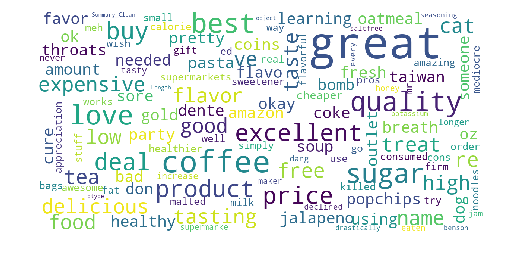

In [47]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl


stopwords = set(STOPWORDS)

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df["Summary_Clean"])

In the word cloud above, some words that stand out are "highly", "addictive", "soothing", and "enjoy," which have a positive meaning. Certain ingredients or products are also highlighted like "chili", "magnesium", "almonds," etc. These word are neutral, but probably appear often in positive reviews as a result of Amazon's inventory; Amazon likely selects to distribute products, like almonds or chili, that meet or surpass users' expectations.



### Displaying reviews of words with low scoring

Reviews of low sccoring means that words that are not quite frequently used ,but even if those are used the rating is considered to be negative of those words

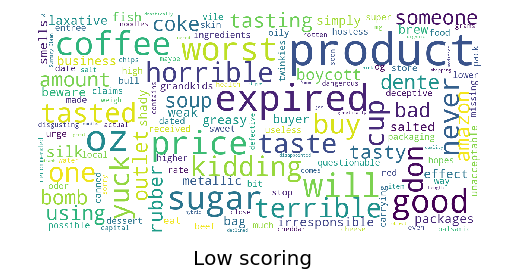

In [48]:
show_wordcloud(df[df.Prediction == 1]["Summary_Clean"], title = "Low scoring")

Above images shows the bad words captured from the review data column from the dataset. Summary of the reviews will be chosen to decide the low category food than the Text which is user comment about the food product

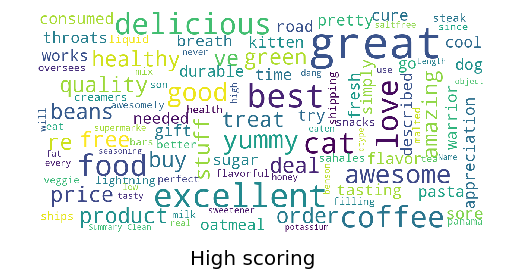

In [49]:
show_wordcloud(df[df.Prediction == 5]["Summary_Clean"], title = "High scoring")

In [50]:
df_class = df[(df['Prediction'] == 1) | (df['Prediction'] == 5)]
df_class.shape

X = df_class['Text']
y = df_class['Prediction']

## Applying Multinominal Naive Bayes Learning Method


Multinomial naive bayes explicitly models the word counts and adjusts the underlying calculations to deal with in. Implementation of Multinominal Naive Bayes method to predict the positive and negative reviews and accuracy of the model using this algorithm.

In [51]:
import string
import nltk
from nltk.corpus import stopwords
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [52]:
sample_text = "I take these with me hiking and camping all the time. It gives me good energy without the nasty corn sryup. Very tasty, and clean whole food. Dates, Almonds, Apples, Walnuts, Raisins, and Cinnamon, whats not to like?. Toss 3-4 of these in my day pack, Along with a lunch and plenty of water, and I'm good for the day."
print(text_process(sample_text))

['take', 'hiking', 'camping', 'time', 'gives', 'good', 'energy', 'without', 'nasty', 'corn', 'sryup', 'tasty', 'clean', 'whole', 'food', 'Dates', 'Almonds', 'Apples', 'Walnuts', 'Raisins', 'Cinnamon', 'whats', 'like', 'Toss', '34', 'day', 'pack', 'Along', 'lunch', 'plenty', 'water', 'Im', 'good', 'day']


Let’s import CountVectorizer and fit an instance to our review text (stored in X), passing in our text_process function as the analyser.

In [53]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

Now, we can look at the size of the vocabulary stored in the vectoriser (based on X) like this:

In [54]:
len(bow_transformer.vocabulary_)

65452

In [55]:
X = bow_transformer.transform(X)

Now that we’ve seen how the vectorisation process works, we can transform our X dataframe into a sparse matrix. To do this, let’s use the .transform() method on our bag-of-words transformed object.


print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))

Create Train and Test data

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Multinomial Naive Bayes is a specialised version of Naive Bayes designed more for text documents. Let’s build a Multinomial Naive Bayes model and fit it to our training set (X_train and y_train).

In [87]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
prediction = nb.predict(X_test)

Next, let’s evaluate our predictions against the actual ratings (stored in y_test) using confusion_matrix and classification_report from Scikit-learn.

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[ 610  738]
 [ 246 9352]]


             precision    recall  f1-score   support

          1       0.71      0.45      0.55      1348
          5       0.93      0.97      0.95      9598

avg / total       0.90      0.91      0.90     10946



Looks like our model has achieved 91% accuracy! This means that our model can predict whether a user liked a local business or not, based on what they typed!

### Predicting a singular positive review 

In [76]:
positive_review = df_class['Text'][567]
positive_review

positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]

5

### Predicting a singular negative review

In [75]:
negative_review = df_class['Text'][271]
negative_review

negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

1

## Applying Bernoulli Naive Bayes Learning Method

Bernoulli Naive Bayes generates boolean value/indicator about each term of the vocabulary equal to 1 if the term belongs to examining document,if not it marks 0. Non accruing terms in document are takes into document and they are factored when computing the conditional probabilities and thus the absence of terms is taken into account. Implementation of Bernoulli Naive Bayes method to predict the positive and negative reviews and accuracy of the model using this algorithm.

In [77]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB().fit(X_train, y_train)
predic = model.predict(X_test)


In [78]:
print(confusion_matrix(y_test, predic))
print('\n')
print(classification_report(y_test, predic))

[[ 336 1012]
 [ 357 9241]]


             precision    recall  f1-score   support

          1       0.48      0.25      0.33      1348
          5       0.90      0.96      0.93      9598

avg / total       0.85      0.87      0.86     10946



Looks like our model has achieved 85% accuracy! This means that our model can predict whether a user liked a local business or not, based on what they typed!

### Predicting a singular positive review

In [79]:
pos_review = df_class['Text'][567]
pos_review

pos_review_transformed = bow_transformer.transform([pos_review])
nb.predict(pos_review_transformed)[0]

5

### Predicting a singular Negative review

In [80]:
neg_review = df_class['Text'][271]
neg_review

neg_review_transformed = bow_transformer.transform([neg_review])
nb.predict(neg_review_transformed)[0]

1

## Applying Logistic Regression Learning method

Implementation of logistic regression method to predict the positive and negative reviews and accuracy of the model using this algorithm.

In [81]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5).fit(X_train, y_train)
prdct = logreg.predict(X_test)



In [82]:
print(confusion_matrix(y_test, prdct))
print('\n')
print(classification_report(y_test, prdct))

[[ 950  398]
 [ 311 9287]]


             precision    recall  f1-score   support

          1       0.75      0.70      0.73      1348
          5       0.96      0.97      0.96      9598

avg / total       0.93      0.94      0.93     10946



Looks like our model has achieved 93% accuracy! This means that our model can predict whether a user liked a local business or not, based on what they typed!

### Predicting a singular positive review

In [83]:
pstv_review = df_class['Text'][567]
pstv_review

pstv_review_transformed = bow_transformer.transform([pstv_review])
nb.predict(pstv_review_transformed)[0]

5

### Predicting a singular negative review

In [84]:
ngtv_review = df_class['Text'][271]
ngtv_review

ngtv_review_transformed = bow_transformer.transform([ngtv_review])
nb.predict(ngtv_review_transformed)[0]

1

# Looking at best words by the co-efficients

In [90]:
words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logreg.coef_[0])),
    columns = ['feature', 'coef'])

feature_coefs.sort_values(by='coef')

,feature,coef
58933,gayle,-18.300395
22159,but order was,-15.527647
64929,great any time,-14.661673
46851,excellent quality my,-13.741647
48918,faulty packaging,-12.432722
60254,glasses,-11.989689
225,absolute worst,-11.910354
51611,flavor or produce,-11.764256
33673,could be misleading ingredient,-11.681514
54527,for liquid,-11.533751


In [93]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

df["Summary_Clean"] = df["Summary"].apply(cleanup)

train, test = train_test_split(df, test_size=0.2)
print("%d items in training data, %d in test data" % (len(train), len(test)))

39997 items in training data, 10000 in test data


In [94]:
from wordcloud import WordCloud, STOPWORDS

# To cleanup stop words, add stop_words = STOPWORDS
# But it seems to function better without it
count_vect = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = count_vect.fit_transform(train["Summary_Clean"])

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["Sentiment"]
y_test = test["Sentiment"]

prediction = dict()

In [95]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)

In [96]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

In [97]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)

## Individual Model Behaviour wrt to classifiers

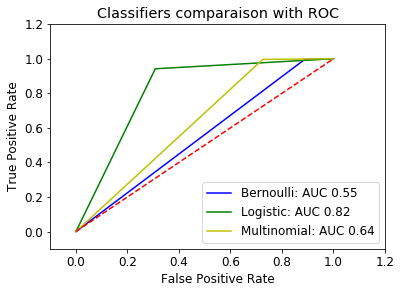

In [98]:
from sklearn.metrics import roc_curve, auc


def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Logistic Regression curve has the highest AUC value compared to the multinominal and brnoulli 

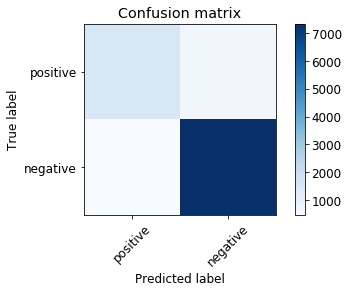

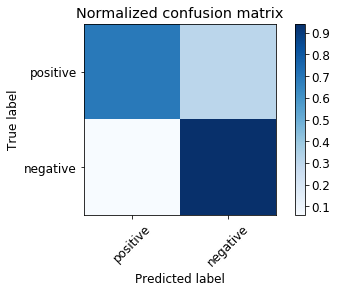

In [99]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

### Checking both positive and negative response in a review

In [100]:
def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))

test_sample(logreg, "The food was delicious, it smelled great and the taste was awesome")
test_sample(logreg, "The whole experience was horrible. The smell was so bad that it literally made me sick.")
test_sample(logreg, "The food was ok, I guess. The smell wasn't very good, but the taste was ok.")

Sample estimated as POSITIVE: negative prob 0.076792, positive prob 0.923208
Sample estimated as NEGATIVE: negative prob 0.999974, positive prob 0.000026
Sample estimated as NEGATIVE: negative prob 0.999186, positive prob 0.000814


Example of the POSITIVE and NEGATIVE result is shown above using the TEXT value of the dataset. negative probability for the first sentense is 0.01 and Positive probability is 0.98 which clearly shows that product review is positive and product is good. Same for the second example, positive prob is 0.002 and Negative prob is 0.999 which shows that second product is really bad and not suggested by any of the users.

In [104]:
c = CountVectorizer(stop_words = 'english')

text_fit(X_u, y_u, c, LogisticRegression())

# features: 4376
# train records: 348
# test records: 116
Model Accuracy: 0.5603448275862069

-Top 20 positive-
Coefficient         Word
   0.799758           ve
   0.758751         make
   0.689269       ginger
   0.670242       bitter
   0.648299        blend
   0.622578         dogs
   0.583257    wonderful
   0.578314          oil
   0.577700      protein
   0.576293      flavors
   0.572408         need
   0.571506          try
   0.554236      cookies
   0.552134        light
   0.549020         milk
   0.545444   definitely
   0.532131      tasting
   0.529806      quality
   0.527937  ingredients
   0.525333      regular

-Top 20 negative-
Coefficient       Word
  -0.408963     priced
  -0.410372     easier
  -0.424496       know
  -0.436274      guess
  -0.445096       life
  -0.455009     highly
  -0.467618  recommend
  -0.477904      packs
  -0.514334       list
  -0.516429      early
  -0.521031      drink
  -0.555607     amazon
  -0.556803      syrup
  -0.603119     stores

In [105]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')

text_fit(X_u, y_u, tfidf_n, LogisticRegression())

# features: 19218
# train records: 348
# test records: 116
Model Accuracy: 0.603448275862069

-Top 20 positive-
Coefficient          Word
   0.575400            ve
   0.518527          milk
   0.512808          make
   0.479241        ginger
   0.471903          food
   0.459899           cat
   0.444517           dog
   0.417989          dogs
   0.407911         tried
   0.380999   ingredients
   0.376463        flavor
   0.373451       flavors
   0.371083         light
   0.355310        little
   0.354241           oil
   0.348994       quality
   0.345226          need
   0.328104     wonderful
   0.327364  best tasting
   0.323748       tasting

-Top 20 negative-
Coefficient       Word
  -0.237391  ice cream
  -0.244588     steaks
  -0.244874      br br
  -0.245716   enjoying
  -0.247453       life
  -0.247937       item
  -0.248063     skinny
  -0.250378     course
  -0.272275       know
  -0.273472     highly
  -0.273869      syrup
  -0.274769      early
  -0.283887  delivered
 

In [106]:
print('Downvote score 5 comments examples:')
print(under_sample_data[under_sample_data['% Upvote']==0]['Text'].iloc[:100:20])
print('Upvote score 5 comments examples')
print(under_sample_data[under_sample_data['% Upvote']==1]['Text'].iloc[:100:20])

Downvote score 5 comments examples:
845      I thank that the French  vanilla cappuccino  i...
5156     It took two or three cans, but I love these no...
9270     cook for all recipes and for everyday re-heati...
15389    Non-GE - "GE" stands for genetic engineering a...
19342    My daughter is away at bording shcool and loiv...
Name: Text, dtype: object
Upvote score 5 comments examples
5245     If you haven't tried this chili powder yet, yo...
21564    You might think pasta is pasta, but no.  This ...
45445    Is Wellness relatively expensive? Yes. Is it w...
21641    I fell in love with Jamaica Blue Mountain coff...
3009     I have 2 cats and this has been their fav for ...
Name: Text, dtype: object


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, random_state=0)

clf_lr = LogisticRegression().fit(X_train, y_train)
acc_lr = clf_lr.score(X_test, y_test)
print('Logistic Regression accuracy: {}'.format(acc_lr))

clf_svm = svm.SVC().fit(X_train, y_train)
acc_svm = clf_svm.score(X_test, y_test)
print('SVM accuracy: {}'.format(acc_svm))

Logistic Regression accuracy: 0.5689655172413793
SVM accuracy: 0.5172413793103449


Predicting some particular words used by some users

In [108]:
df_user = odf.groupby(['UserId', 'ProfileName']).agg({'Prediction':['count', 'mean']})
df_user.columns = df_user.columns.get_level_values(1)
df_user.columns = ['Prediction count', 'Prediction mean']
df_user = df_user.sort_values(by = 'Prediction count', ascending = False)
print(df_user.head(10))

                                                       Prediction count  \
UserId         ProfileName                                                
A1YUL9PCJR3JTY O. Brown "Ms. O. Khannah-Brown"                       41   
AY12DBB0U420B  Gary Peterson                                         38   
A3OXHLG6DIBRW8 C. F. Hill "CFH"                                      38   
A281NPSIMI1C2R Rebecca of Amazon "The Rebecca Review"                32   
A1Z54EM24Y40LL c2                                                    28   
A3TVZM3ZIXG8YW christopher hayes                                     22   
AKMEY1BSHSDG7  J. Arena                                              20   
A3D6OI36USYOU1 Ghenghis                                              20   
A31N6KB160O508 Fran W.                                               20   
A1TMAVN4CEM8U8 Gunner                                                18   

                                                       Prediction mean  
UserId         ProfileName

In [109]:
test_sample(logreg, "The smell reminded me of ammonia")

Sample estimated as NEGATIVE: negative prob 0.558326, positive prob 0.441674


Removing punctuation for deciding the accurcy of the review

In [111]:
#remove punctuation
import unicodedata
import sys

df1 = df.iloc[:, [4,5,6,9]]
tbl = dict.fromkeys(i for i in range(sys.maxunicode)
                      if unicodedata.category(chr(i)).startswith('P'))
def remove_punctuation(text):
    return text.translate(tbl)

df1['Text']=df1['Text'].apply( lambda x: remove_punctuation(x))
df1["Text"].head(4)

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


0    I got them in a very timely manner and theyre ...
1    McCanns Steel Cut Oatmeal is the perfect break...
2    I would recommend it Quality pearls and a few ...
3    I have to admit I first purchased these Hazeln...
Name: Text, dtype: object

In [113]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from itertools import chain

def get_token_ngram(Prediction, benchmark, userid='all'):

    if userid != 'all':
        odf = df[(df['UserId'] == userid) & (df['Prediction'] == Prediction)]['Text']
    else:
        odf = df[df['Prediction'] == Prediction]['Text']
        
    count = len(odf)
    total_text = ' '.join(odf)
    total_text = total_text.lower()
    stop = set(stopwords.words('english'))
    total_text = nltk.word_tokenize(total_text)
    total_text = [word for word in total_text if word not in stop and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    total_text = [lemmatizer.lemmatize(w,'v') for w in total_text]
    bigrams = ngrams(total_text,2)
    trigrams = ngrams(total_text, 3)

    # look at 2-gram and 3-gram together
    combine = chain(bigrams, trigrams)
    text = nltk.Text(combine)
    fdist = nltk.FreqDist(text)
    
    # return only phrase occurs more than benchmark of his reviews
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) if fdist[w] >= count*benchmark], key=lambda x: -x[1])

# score 1-5 reviews with this user
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = get_token_ngram(j, 0.25, 'A2M9D9BDHONV3Y')
    print('Prediction {} reviews most popular 2-gram / 3-gram:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

Prediction 1 reviews most popular 2-gram / 3-gram:
    Count Occur %                                Phrase
0     4.0   80.0%               (monosodium, glutamate)
1     3.0   60.0%                          (like, salt)
63    2.0   40.0%                          (real, food)
73    2.0   40.0%                        (water, taste)
72    2.0   40.0%  (would, manufacturers, deliberately)
71    2.0   40.0%                           (use, real)
70    2.0   40.0%                           (msg, like)
69    2.0   40.0%                         (since, look)
68    2.0   40.0%                   (well, know, study)
67    2.0   40.0%                 (read, contain, much)
66    2.0   40.0%    (customers, monosodium, glutamate)
65    2.0   40.0%          (receive, consumers, really)
64    2.0   40.0%                    (sound, delicious)
62    2.0   40.0%                          (well, know)
61    2.0   40.0%         (much, monosodium, glutamate)
60    2.0   40.0%             (consumers, really, wan

KeyError: 'Count'

In [114]:
# score 1-5 reviews with all users
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    # easier benchmark since we have many different users here, thus different phrase
    d = get_token_ngram(j, 0.03)
    print('score {} reviews most popular 2-gram / 3-gram:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

score 1 reviews most popular 2-gram / 3-gram:
   Count Occur %          Phrase
0  496.0  10.74%   (taste, like)
1  200.0   4.33%  (waste, money)
2  181.0   3.92%    (could, n't)
3  179.0   3.88%     (n't, even)
4  172.0   3.73%     (n't, know)
5  153.0   3.31%      (n't, buy)
6  146.0   3.16%    (would, n't)
score 2 reviews most popular 2-gram / 3-gram:
    Count Occur %          Phrase
0   264.0   9.94%   (taste, like)
1   134.0   5.05%     (n't, like)
2   120.0   4.52%      (..., ...)
3   117.0   4.41%      (n't, buy)
4   110.0   4.14%    (would, n't)
5   104.0   3.92%  (think, would)
6    93.0    3.5%   (href=, http)
7    86.0   3.24%     (n't, know)
8    85.0    3.2%  (much, better)
9    83.0   3.13%    (n't, taste)
10   80.0   3.01%    (could, n't)
score 3 reviews most popular 2-gram / 3-gram:
   Count Occur %            Phrase
0  277.0   7.27%     (taste, like)
1  169.0   4.44%      (would, n't)
2  152.0   3.99%     (href=, http)
3  140.0   3.68%     (taste, good)
4  132.0   3.47

In [115]:
def get_token_adj(Prediction, benchmark, userid='all'):
    
    if userid != 'all':
        odf = df[(df['UserId'] == userid) & (df['Prediction'] == Prediction)]['Text']
    else:
        odf = df[df['Prediction'] == Prediction]['Text']
        
    count = len(odf)
    total_text = ' '.join(odf)
    total_text = total_text.lower()
    stop = set(stopwords.words('english'))
    total_text = nltk.word_tokenize(total_text)
    total_text = [word for word in total_text if word not in stop and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    total_text = [lemmatizer.lemmatize(w,'a') for w in total_text]
    # get adjective only
    total_text = [word for word, form in nltk.pos_tag(total_text) if form == 'JJ']
    
    text = nltk.Text(total_text)
    fdist = nltk.FreqDist(text)
    
    # return only phrase occurs more than benchmark of his reviews
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) if fdist[w] >= count*benchmark], key=lambda x: -x[1])

In [116]:
# score 1-5 reviews with this user
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = get_token_adj(j, 0.25, 'A2M9D9BDHONV3Y')
    print('score {} reviews most popular adjectives word:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

score 1 reviews most popular adjectives word:
    Count Occur %      Phrase
0     4.0   80.0%   delicious
1     4.0   80.0%         bad
2     3.0   60.0%        much
3     2.0   40.0%         fat
4     2.0   40.0%        real
5     2.0   40.0%   glutamate
6     2.0   40.0%     bottled
7     2.0   40.0%        lean
8     2.0   40.0%       awful
9     2.0   40.0%  nutritious
10    2.0   40.0%    terrific
11    2.0   40.0%      hormel
score 2 reviews most popular adjectives word:
    Count Occur %      Phrase
0     2.0  100.0%      cheese
2     2.0  100.0%       whole
1     2.0  100.0%      desert
11    1.0   50.0%         pie
17    1.0   50.0%  particular
16    1.0   50.0%        late
15    1.0   50.0%        firm
14    1.0   50.0%       awful
13    1.0   50.0%     pleased
12    1.0   50.0%        high
9     1.0   50.0%       .give
10    1.0   50.0%       sweet
8     1.0   50.0%    complete
7     1.0   50.0%       steak
6     1.0   50.0%       wrong
5     1.0   50.0%       black
4     1.

KeyError: 'Count'

In [117]:
reviews = df[['Prediction','Summary']]

In [118]:
scores = reviews['Prediction']
reviews['Prediction'] = reviews['Prediction'].apply(lambda x : 'pos' if x > 3 else 'neg')

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [119]:
scores.mean()

4.177990679440766

In [120]:
reviews.groupby('Prediction')['Summary'].count()

Prediction
neg    11081
pos    38916
Name: Summary, dtype: int64

Count the number of the users who for the positive and negative reviews based on the prediction value greater than 3 out of 5 scale. 

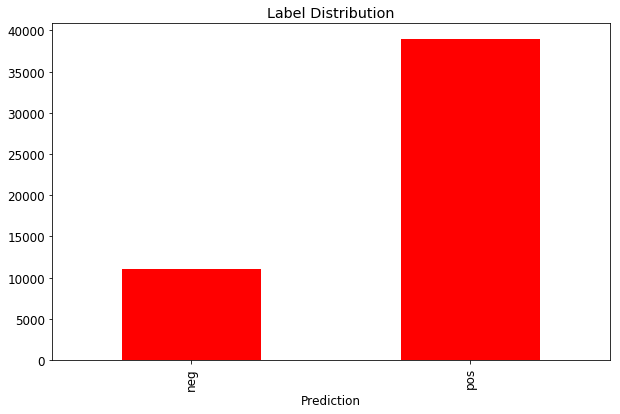

In [121]:
reviews.groupby('Prediction')['Summary'].count().plot(kind='bar',color=['r','g'],title='Label Distribution',figsize=(10,6))
plt.show()

negative and positive ratio bar

In [122]:

print ('Percentage of negative reviews %.2f %%' % ((reviews.groupby('Prediction')['Summary'].count()['neg'])*100.0/len(reviews)))
print ('Percentage of positive reviews %.2f %%' % ((reviews.groupby('Prediction')['Summary'].count()['pos'])*100.0/len(reviews)))

Percentage of negative reviews 22.16 %
Percentage of positive reviews 77.84 %


We can see that almost 78 % reviews are positive for the amazon food products. Users who have rated less than 3 out of 5 star are only 22% which shows that Amazon food provides the good service and food and customers are happy with the services.

## splitting data based on labels

In [123]:
def splitPosNeg(Summaries):
    neg = reviews.loc[Summaries['Prediction']=='neg']
    pos = reviews.loc[Summaries['Prediction']=='pos']
    return [pos,neg]

In [124]:
[pos,neg] = splitPosNeg(reviews)

# Preprocessing

## Using lemmatization as it was giving better results than stemming. Other steps include removing punctuation amd upper case to lower case conversion.

In [125]:
#preprocessing steps

#stemmer = PorterStemmer()
lemmatizer = nltk.WordNetLemmatizer()
stop = stopwords.words('english')
translation = str.maketrans(string.punctuation,' '*len(string.punctuation))

def preprocessing(line):
    tokens=[]
    line = line.translate(translation)
    line = nltk.word_tokenize(line.lower())
    for t in line:
        #if(t not in stop):
            #stemmed = stemmer.stem(t)
        stemmed = lemmatizer.lemmatize(t)
        tokens.append(stemmed)
    return ' '.join(tokens)

In [126]:
pos_data = []
neg_data = []
for p in pos['Summary']:
    pos_data.append(preprocessing(p))

for n in neg['Summary']:
    neg_data.append(preprocessing(n))

In [127]:
data = pos_data + neg_data
labels = np.concatenate((pos['Prediction'].values,neg['Prediction'].values))

# Splitting the data into train and test using a stratified strategy


In [128]:

[Data_train,Data_test,Train_labels,Test_labels] = train_test_split(data,labels , test_size=0.25, random_state=20160121,stratify=labels)

In [129]:
## tokenizing the training data to find frequency of words
t = []
for line in Data_train:
    l = nltk.word_tokenize(line)
    for w in l:
        t.append(w)

In [130]:

word_features = nltk.FreqDist(t)
print (len(word_features))

9150


### We can see that the number of unique words in the dataset is pretty huge. When doing text classification the vocabulary of the data set becomes the featureset.

### We would want to reduce the size of this feature set. This can be done in severals ways. 

### One of them is feature reduction using PCA


# Feature Reduction

#### Using PCA

In [131]:
vec_all = CountVectorizer()
ctr_features_all = vec_all.fit_transform(Data_train)

In [132]:
tf_vec_all = TfidfTransformer()
tr_features_all = tf_vec_all.fit_transform(ctr_features_all)

In [133]:
cte_features_all = vec_all.transform(Data_test)
te_features_all = tf_vec_all.transform(cte_features_all)

## Pca doesn't apply to sparse matrices so we use a different version of PCA called Truncated SVD


# Implement SVD 

In [134]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=200)
tr_features_truncated = svd.fit_transform(tr_features_all)

In [135]:
te_features_truncated = svd.transform(te_features_all)

In [136]:
svd = TruncatedSVD(n_components=200)
ctr_features_truncated = svd.fit_transform(ctr_features_all)
cte_features_truncated = svd.transform(cte_features_all)

### Running 4 classification algorithms : Naive Bayes, Logistic Regression, Decision Trees and Perceptron

# Comparison of the Diff Classifiers

In [137]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier

models = {'BernoulliNB': BernoulliNB(binarize=0.5)
          ,'Logistic' : linear_model.LogisticRegression(C=1e5),'Decision Tree' : DecisionTreeClassifier(random_state=20160121, criterion='entropy'),
                                                                                                        'Perceptron': linear_model.Perceptron(n_iter=1000)}

In [138]:
results_svd = pd.DataFrame()

foldnum = 0
tfprediction = {}
cprediction = {}
for name,model in models.items():
        model.fit(tr_features_truncated, Train_labels)
        tfprediction[name] = model.predict(te_features_truncated)
        tfaccuracy = metrics.accuracy_score(tfprediction[name],Test_labels)
        
        #model.fit(ctr_features_truncated,Train_labels)
        #cprediction[name] = model.predict(cte_features_truncated)
        #caccuracy = metrics.accuracy_score(cprediction[name],Test_labels)

        results_svd.loc[foldnum,'Model']=name
        results_svd.loc[foldnum,'TF-IDF Accuracy']=tfaccuracy
        #results_svd.loc[foldnum,'Count Accuracy']=caccuracy
        foldnum = foldnum+1
print (results_svd)

           Model  TF-IDF Accuracy
0    BernoulliNB          0.78912
1       Logistic          0.84296
2  Decision Tree          0.80960
3     Perceptron          0.77992


It is clear that for the data model of Amazon food reviews, Decision tree classifier is the best as the accuracy provided by the Decision tree classifier is almost 86% which is best out of all the 4 classiefier that we have implemented. After that, Logistic regression classifier has accuracy of 84.4% which is slightly less than the Decision tree but better than the other 2 classifiers. Same like the logistic regression, Perceptron has almost 82.2% accuracy which is good for the model. We can notice that BernoulliNB has accuracy of 79 which is lower than all other classifier that we have implemented for the Amazon food review model.

In [139]:
for name,model in models.items():
    print ("Classification report for ",name)
    print(metrics.classification_report(Test_labels, tfprediction[name]))
    print("\n")

Classification report for  BernoulliNB
             precision    recall  f1-score   support

        neg       0.90      0.05      0.10      2770
        pos       0.79      1.00      0.88      9730

avg / total       0.81      0.79      0.71     12500



Classification report for  Logistic
             precision    recall  f1-score   support

        neg       0.75      0.43      0.55      2770
        pos       0.86      0.96      0.90      9730

avg / total       0.83      0.84      0.83     12500



Classification report for  Decision Tree
             precision    recall  f1-score   support

        neg       0.57      0.58      0.57      2770
        pos       0.88      0.88      0.88      9730

avg / total       0.81      0.81      0.81     12500



Classification report for  Perceptron
             precision    recall  f1-score   support

        neg       0.50      0.72      0.59      2770
        pos       0.91      0.80      0.85      9730

avg / total       0.82      0.78  

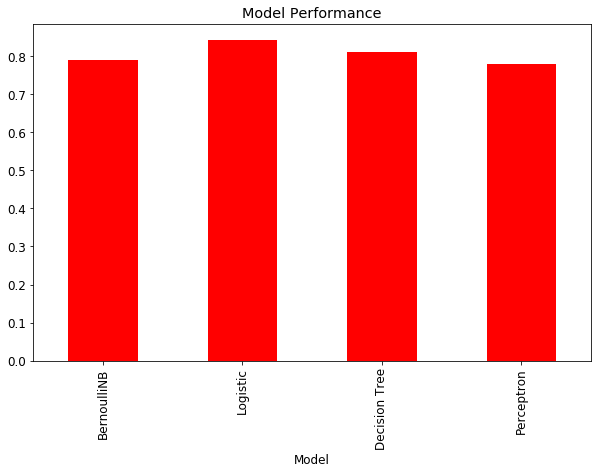

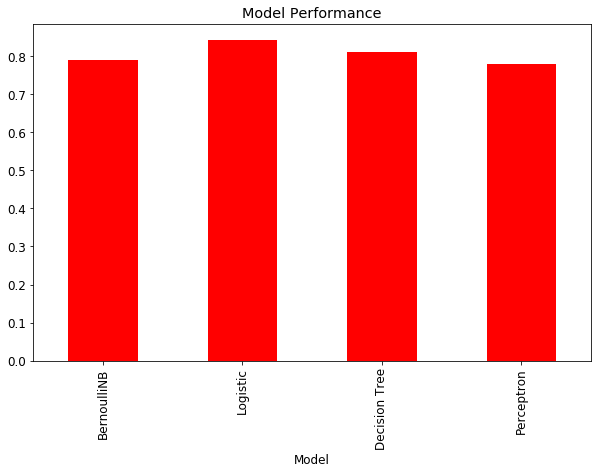

In [141]:
results_svd.plot(kind='bar',color=['r','g','b','y'],title='Model Performance',figsize=(10,6),x='Model',legend=False)
plt.show()

# Random Forest Classifier

In [144]:
### Cleaning data to remove Stopwords and Small length words also lemmatized data to bring into common format

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
import re

lmtzr = WordNetLemmatizer()
negation = re.compile(r"(?:^(?:never|no|nothing|nowhere|noone|none|not|havent|hasnt|hadnt|cant|couldnt|shouldnt|wont|wouldnt|dont|doesnt|didnt|isnt|arent|aint)$)|n't",re.I)
clp = re.compile(r"^[.:;!?]$",re.I)
    
def extract_words_from_comments(df):
    comments_tok = []
    for index, datapoint in df.iterrows():
        tokenized_words = word_tokenize(datapoint["Text"].lower(),language='english')
        pos_tagged_words = pos_tag(tokenized_words)
        tokenized_words = ["_".join([lmtzr.lemmatize(i[0]),i[1]]) for i in pos_tagged_words if (i[0] not in stopwords.words("english") and len(i[0]) > 2)]
        comments_tok.append(tokenized_words)
    df["comment_tok"] = comments_tok
    return df

df = extract_words_from_comments(df.head(500))
print (df.head())
print (df.shape)

       Id   ProductId          UserId                ProfileName  \
0  492346  B001VNP0Y6   AEZRVY3CV52UZ  Corey Wright "Democratus"   
1  343811  B008J1HO4C  A18VZYSLOUO060    D. Simpson "Frugal SOB"   
2  347257  B000FFIL60  A28Y1M7GRG0I9M        Real Comments "Lin"   
3  225529  B002ZX1U9A  A245HC4T5J97WG            Logan DeAngelis   
4  485488  B001RVFERK   AVABPJCKE2MR5                       spal   

   HelpfulnessNumerator  HelpfulnessDenominator  Prediction        Time  \
0                     3                       3           5  1320537600   
1                     2                       2           5  1204329600   
2                     0                       0           4  1318464000   
3                     0                       0           5  1306540800   
4                     0                       0           4  1314921600   

                         Summary  \
0             Just what I needed   
1         Most excellent oatmeal   
2                    Quality Tea

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Vectorize words using BOW technique


In [145]:
from gensim import matutils,corpora, models

def vectorize_comments(df):
    d = corpora.Dictionary(df["comment_tok"])
    d.filter_extremes(no_below=2, no_above=0.8)
    d.compactify()
    corpus = [d.doc2bow(text) for text in df["comment_tok"]]
    # tfidf = TfidfModel(corpus=corpus,id2word=d)
    # corpus_tfidf = tfidf[corpus]
    # corpus_tfidf = matutils.corpus2csc(corpus_tfidf,num_terms=len(d.token2id))
    corpus = matutils.corpus2csc(corpus, num_terms=len(d.token2id))
    corpus = corpus.transpose()
    return d, corpus

dictionary,corpus = vectorize_comments(df)
print (corpus.shape)

(500, 1950)


# Train Random forest classifier


In [146]:
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pickle


def train_classifier(X,y):
    n_estimators = [100]
    min_samples_split = [2]
    min_samples_leaf = [1]
    bootstrap = [True]

    parameters = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf,
                  'min_samples_split': min_samples_split}

    clf = GridSearchCV(RFC(verbose=1,n_jobs=4), cv=4, param_grid=parameters)
    clf.fit(X, y)
    return clf

X_train, X_test, y_train, y_test = cross_validation.train_test_split(corpus, df["Prediction"], test_size=0.02, random_state=17)
classifier = train_classifier(X_train,y_train)
print (classifier.best_score_, "----------------Accuracy score on Cross Validation Sets")
print (classifier.score(X_test,y_test))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: 

0.610204081632653 ----------------Accuracy score on Cross Validation Sets
0.5


In [147]:
#Apply TfidfVectorizer to review text

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics



# Improving Prediction with K-Means Clustering of Reviews

In [148]:
model = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1,random_state=5)

vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words='english')
vectorizer.fit(df1['Text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=0.05,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [149]:
X_train = vectorizer.transform(df1['Text'])
vocab = vectorizer.get_feature_names()
sse_err = []
res = model.fit(X_train)
vocab = np.array(vocab)
cluster_centers = np.array(res.cluster_centers_)
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-10:]]))
words=list(words)

In [150]:
#top 10 words for each cluster
words

['tea',
 'food',
 'drink',
 'flavor',
 'br br',
 'really',
 'good',
 'coffee',
 'best',
 'great',
 'product',
 'love',
 'br',
 'cup',
 'like',
 'amazon',
 'taste',
 'use',
 'price',
 'just']

In [151]:
#add top words to train set
train_set=X_train[:,[np.argwhere(vocab==i)[0][0] for i in words]]

In [152]:
# how many observations are in each cluster
df1['cluster'] = model.labels_
df1.groupby('cluster').count()

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,HelpfulnessNumerator,HelpfulnessDenominator,Prediction,Text
cluster,,,,
0,7506,7506,7506,7506
1,27729,27729,27729,27729
2,5519,5519,5519,5519
3,9243,9243,9243,9243


In [153]:
# what does each cluster look like
df1.groupby('cluster').mean()

,HelpfulnessNumerator,HelpfulnessDenominator,Prediction
cluster,,,
0,1.634559,2.006395,4.223954
1,1.383461,1.810127,4.237874
2,1.734191,2.351694,4.019750
3,2.809802,3.481554,4.055501


# Improving Prediction with Logistic Regression of Reviews


In [154]:
stops = set(stopwords.words("english"))

def binarize_prediction(prediction):
    """
    set prediction of 1-3 to 0 and 4-5 as 1
    """
    
    if prediction <3:
        return 0
    else:
        return 1



def review_to_words( review ):
    """
    Return a list of cleaned word tokens from the raw review
    
    """
        
    #Remove any HTML tags and convert to lower case
    review_text = BeautifulSoup(review).get_text().lower() 
    
    #Replace smiliey and frown faces, ! and ? with coded word SM{int} in case these are valuable
    review_text=re.sub("(:\))",r' SM1',review_text)
    review_text=re.sub("(:\()",r' SM2',review_text)
    review_text=re.sub("(!)",r' SM3',review_text)
    review_text=re.sub("(\?)",r' SM4',review_text)
    
    #keep 'not' and the next word as negation may be important
    review_text=re.sub(r"not\s\b(.*?)\b", r"not_\1", review_text)
    
    #keep letters and the coded words above, replace the rest with whitespace
    nonnumbers_only=re.sub("[^a-zA-Z\_(SM\d)]"," ",review_text)  
    
    #Split into individual words on whitespace
    words = nonnumbers_only.split()                             
    
    #Remove stop words
    words = [w for w in words if not w in stops]   
    
    return (words)



def avg_word_vectors(wordlist,size):
    """
    returns a vector of zero for reviews containing words where none of them
    met the min_count or were not seen in the training set
    
    Otherwise return an average of the embeddings vectors
    
    """
    
    sumvec=np.zeros(shape=(1,size))
    wordcnt=0
    
    for w in wordlist:
        if w in model:
            sumvec += model[w]
            wordcnt +=1
    
    if wordcnt ==0:
        return sumvec
    
    else:
        return sumvec / wordcnt

In [155]:
from bs4 import BeautifulSoup

df['Prediction_binary']=df['Prediction'].apply(binarize_prediction)
df['word_list']=df['Summary'].apply(review_to_words)

print (df.head(n=10))

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/user/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/user/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 Bea

       Id   ProductId          UserId                ProfileName  \
0  492346  B001VNP0Y6   AEZRVY3CV52UZ  Corey Wright "Democratus"   
1  343811  B008J1HO4C  A18VZYSLOUO060    D. Simpson "Frugal SOB"   
2  347257  B000FFIL60  A28Y1M7GRG0I9M        Real Comments "Lin"   
3  225529  B002ZX1U9A  A245HC4T5J97WG            Logan DeAngelis   
4  485488  B001RVFERK   AVABPJCKE2MR5                       spal   
5   74981  B0026RQTGE  A161Y9NAR43WCW                     vertov   
6  204180  B000F0FZE6  A1H35JZ9UUCVIF                   carrera4   
7  454372  B0019K981W  A13H71301WENPW     Patricia Fentriss "PF"   
8  112235  B0009JJB4S  A2HBOYLMGW2A5Y                        lee   
9  295251  B000LQNK50   ATO0RF3HWQ3WW            Scott "Scottso"   

   HelpfulnessNumerator  HelpfulnessDenominator  Prediction        Time  \
0                     3                       3           5  1320537600   
1                     2                       2           5  1204329600   
2                     0   

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [156]:
from gensim.models import Word2Vec

X_train, X_test, y_train, y_test = train_test_split(df['word_list'], df['Prediction_binary'], test_size=0.1, random_state=42)


#size of hidden layer (length of continuous word representation)
dimsize=400

#train word2vec on 80% of training data
model = Word2Vec(X_train.values, size=dimsize, window=5, min_count=5, workers=4)

#create average vector for train and test from model
#returned list of numpy arrays are then stacked 
X_train=np.concatenate([avg_word_vectors(w,dimsize) for w in X_train])
X_test=np.concatenate([avg_word_vectors(w,dimsize) for w in X_test])

In [157]:
#basic logistic regression with SGD
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

clf = linear_model.SGDClassifier(loss='log')
clf.fit(X_train, y_train)
p=clf.predict_proba(X_test)
roc_auc_score(y_test,p[:,1])

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.6950757575757576

In [161]:
# setting kNN classifier
knn = KNeighborsClassifier(n_neighbors=11)

# kNN cross validation

# print("KfoldCrossVal mean score using kNN is %s" %cross_val_score(knn,X,y,cv=10).mean())

# kNN metrics
kNNm = knn.fit(X_train, y_train)

y_pred = kNNm.predict(X_test)
print("Accuracy score using kNN is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using kNN is 0.9


### Accuracy which we get here is 90% using the KNN which was previously less than this using other classifiers

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
# min_df=5, discard words appearing in less than 5 documents
# max_df=0.8, discard words appering in more than 80% of the documents
# sublinear_tf=True, use sublinear weighting
# use_idf=True, enable IDF
vectorizer = TfidfVectorizer(min_df=5,
                             max_df = 0.8,
                             sublinear_tf=True,
                             use_idf=True)

train_vectors = vectorizer.fit_transform(df["Text"])
feature_names = vectorizer.get_feature_names()

In [163]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print (vocab[1:200])

['10', '100', '12', '16', '20', '23', '24', '30', '40', '50', '99', 'able', 'about', 'above', 'absolutely', 'actually', 'add', 'added', 'adding', 'additives', 'admit', 'after', 'afternoon', 'aftertaste', 'again', 'ago', 'air', 'all', 'allergic', 'almond', 'almonds', 'almost', 'already', 'also', 'alternative', 'although', 'always', 'am', 'amazing', 'amazon', 'amount', 'an', 'and', 'another', 'any', 'anyone', 'anything', 'anywhere', 'apple', 'apples', 'appreciate', 'are', 'area', 'around', 'arrived', 'artificial', 'as', 'at', 'ate', 'available', 'average', 'avoid', 'away', 'awesome', 'baby', 'back', 'bad', 'bag', 'bags', 'bar', 'bars', 'based', 'be', 'bean', 'beans', 'beat', 'because', 'bed', 'beef', 'been', 'before', 'being', 'believe', 'benefit', 'best', 'better', 'between', 'big', 'bit', 'bite', 'bitter', 'black', 'blend', 'blueberry', 'bold', 'bones', 'both', 'bottle', 'bottom', 'bought', 'bowl', 'box', 'boxes', 'br', 'brand', 'brands', 'break', 'breakfast', 'breath', 'brew', 'brewed

In [164]:
from sklearn.metrics import accuracy_score

print ("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_vectors, df["Summary"] )

# prediction_rbf = classifier_rbf.predict(test_vectors)

Training the random forest...


In [165]:
def sampling_dataset(df):
    count = 5000
    class_df_sampled = pd.DataFrame(columns = ["Prediction","Text", "Summary"])
    temp = []
    for c in df.Prediction.unique():
        class_indexes = df[df.Prediction == c].index
        random_indexes = np.random.choice(class_indexes, count, replace=True)
        temp.append(df.loc[random_indexes])
        
    for each_df in temp:
        class_df_sampled = pd.concat([class_df_sampled,each_df],axis=0)
    
    return class_df_sampled

df_Sample = sampling_dataset(df.loc[:,["Prediction","Text","Summary"]])
df_Sample.reset_index(drop=True,inplace=True)
print (df_Sample.head())
print (df_Sample.shape)



  Prediction                                               Text  \
0          5  My neighbor gave me a sample from a local Pet ...   
1          5  We have a very difficult cat when it comes to ...   
2          5  My puppy is a Boxador (Boxer/Lab) and she love...   
3          5  I bought one of each color, blue, orange and g...   
4          5  Love the Lavazza crema E Gusto. It is very fin...   

                                             Summary  
0                        Great Treat for small Dogs!  
1  We order them from oversees since our cat only...  
2                                  Great Puppy Chow!  
3                      great ice cubes for baby food  
4     excellent espresso coffee with very fine grind  
(25000, 3)


In [166]:
df_TestSample = sampling_dataset(df.loc[:,["Prediction","Text","Summary"]])
df_TestSample.reset_index(drop=True,inplace=True)

print (df_TestSample.head())
print (df_TestSample.shape)

  Prediction                                               Text  \
0          5  I can't find these anywhere on the west coast....   
1          5  We buy alot of coffee and this starbucks coffe...   
2          5  This pepperoni is a fixture at our family New ...   
3          5  Have tasted these in CA and wanted them here i...   
4          5  I usually try to glance at the ingredients lis...   

                               Summary  
0                              Awesome  
1         Starbucks Via Instant Coffee  
2                    Always delicious!  
3  Primal Spirit Vegan Jerky Texas BBQ  
4                  Spicy and delicious  
(25000, 3)


In [167]:
test_vectors = vectorizer.transform(df_TestSample["Summary"])
prediction_rbf = forest.predict(test_vectors)

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

Classifiers = [
#     LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
#     SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
#     RandomForestClassifier(n_estimators=200),
#     AdaBoostClassifier(),
    GaussianNB()
]

## REFERENCES

1.) Burke, R., Hybrid Recommender Systems: Survey and Experiments, <http://josquin.cs.depaul.edu/rburke/pubs/burke-umuai02.pdf>.

2.) Gunawardana A., Shani G, Evaluating Recommendation Systems, <http://research.microsoft.com/pubs/115396/evaluationmetrics.tr.pdf>.

3.) Wikipedia, Singular Value Decomposition, <http://en.wikipedia.org/ wiki/Singular value decomposition>.

4.) Koren, Y., Factorization Meets the Neighborhood: a Multifaceted Col-laborative Filtering Model,<http://public.research.att.com/ volinsky/netflix/kdd08koren.pdf>.

5.) Shang, M., Fu, Y., Chen, D., Personal Recommendation Using Weighted BiPartite Graph Projection, Apperceiving Computing and Intelligence Analysis, 2008. ICACIA 2008. International Conference on , vol., no., pp.198,202,
13-15 Dec. 2008

6.) Breese, J.S., Heckerman, D., Kadie, C., Empirical Analysis of Predictive Algorithms for Collaborative Filtering, <http://research.microsoft.com/ pubs/69656/tr-98-12.pdf>


# LICENSE : 

The code in the document by Ronak Shingala and Spurthi Shetty is licensed under the MIT License https://opensource.org/licenses/MIT

https://github.com/shingalaronak/Advance-Data-Science-Final-Project